In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('../Data/CancerCvs.csv', sep=';')

In [7]:
def null_percentage(df):
    """
    Returns a DataFrame with the percentage of null (NaN) values per column.
    """
    percentage = df.isnull().mean() * 100
    return percentage.to_frame(name='Null Percentage')


def zero_percentage(df):
    """
    Returns a DataFrame with the percentage of zero values per column.
    """
    percentage = (df == 0).mean() * 100
    return percentage.to_frame(name='Zero Percentage')

In [8]:
df = pd.read_csv('../Data/CancerCvs.csv', sep=';')
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,30/11/2020,Liver,II,Radiation,4/12/2020,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,10/10/2015,Leukemia,III,Surgery,5/11/2015,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,13/02/2018,Liver,III,Radiation,3/08/2018,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,4/02/2022,Lung,III,Radiation,13/03/2022,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,3/12/2019,Pancreatic,II,Chemotherapy,29/02/2020,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [9]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [10]:
null_percentage(df)

,Null Percentage
Patient_ID,0.00
Age,0.00
Gender,0.00
Nationality,0.00
Emirate,0.00
Diagnosis_Date,0.00
Cancer_Type,0.00
Cancer_Stage,0.00
Treatment_Type,0.00
Treatment_Start_Date,0.00


In [11]:
zero_percentage(df)

,Zero Percentage
Patient_ID,0.0
Age,0.0
Gender,0.0
Nationality,0.0
Emirate,0.0
Diagnosis_Date,0.0
Cancer_Type,0.0
Cancer_Stage,0.0
Treatment_Type,0.0
Treatment_Start_Date,0.0


In [12]:
df['Patient_ID'].value_counts()
# Alta varianza, por tanto se elimina

Patient_ID
PAT009984    1
PAT009983    1
PAT009982    1
PAT009981    1
PAT009980    1
            ..
PAT000005    1
PAT000004    1
PAT000003    1
PAT000002    1
PAT000001    1
Name: count, Length: 10000, dtype: int64

<Axes: xlabel='Diagnosis_Date'>

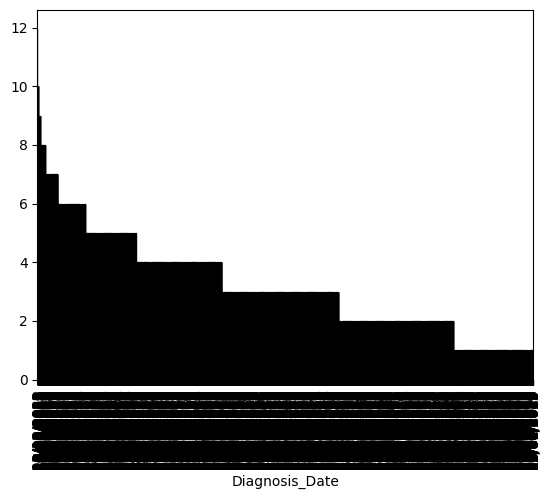

In [13]:
df['Diagnosis_Date'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

In [14]:
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce', dayfirst=True)

# Extraer el año y el mes
df['year'] = df['Diagnosis_Date'].dt.year
df['month'] = df['Diagnosis_Date'].dt.month

C:\Users\Esteban\AppData\Local\Temp\ipykernel_26752\488727945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancer_Type', data=df, palette='pastel')


<Axes: xlabel='Cancer_Type', ylabel='count'>

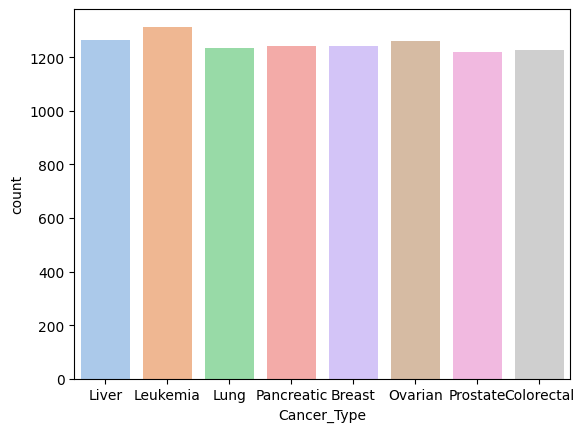

In [15]:
sns.countplot(x='Cancer_Type', data=df, palette='pastel')

In [16]:
df['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [17]:
print("tamaño antes" , df.shape[0])

tamaño antes 10000
